# Title Recommendation for Indonesian News Article Using Long Short-Term Memory with Attention Mechanism - [1st Notebook]
### Final Project of Joshia Cahyadi - 10119086
---

*Notebook* ini adalah *notebook* pertama dari 4 *notebook* lainnya. Terdapat 3 hal yang dilakukan pada *notebook* ini:
1. Membersihkan data mentah (*data cleaning*),
2. Melakukan analisis dan eksplorasi data (*exploratory data analysis*),
3. Menyimpan data yang telah diolah menjadi data baru.

# Melakukan Inisialisasi Libraries yang Dibutuhkan

In [ ]:
# Libraries untuk data manipulation
import pandas as pd
import numpy as np

# Libraries untuk cleaning HTML Tag
from bs4 import BeautifulSoup

# Libraries untuk progress bar
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

# Libraries untuk regular expression and text cleaning
import re
import unicodedata

# Libraries untuk estetika print
import textwrap

# Libraries untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load File Data yang Masih Mentah

In [ ]:
# Membaca file mentah
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir 2/Files/mq_news.csv')

# Mengambil kolom 'title' dan 'content_html'
df = df[['title', 'content_html']]

In [ ]:
df

,title,content_html
0,Tips Agar Resolusi Tahun Baru Bisa Menjadi Aks...,"<div class=""article-content-body__item-page "" ..."
1,Tragedi Mendebarkan di Penghujung 2016,"<div class=""article-content-body__item-page "" ..."
2,"Pantau Tahun Baru, Kapolda Metro Jaya Bonceng ...","<p><strong>JAKARTA, KOMPAS.com</strong> - Kapo..."
3,Terompet dan Kembang Api Bersahutan Sambut Tah...,"<div class=""article-content-body__item-page "" ..."
4,Awas! Copet Berkeliaran di Ancol Malam Tahun B...,"<div class=""article-content-body__item-page "" ..."
...,...,...
455673,"1 Januari, 107.000 Kendaraan Diprediksi Masuk ...","<p><strong>CIKARANG, KOMPAS.com</strong> - Pun..."
455674,"Disebut Akan ke Barcelona, Coutinho Absen dari...","<p><strong>TEMPO.CO</strong>, <strong>Jakarta<..."
455675,Anies dan Rhoma Irama Adu Pantun hingga Nyanyi...,<b>Jakarta</b> -Gubernur DKI Anies Baswedan na...
455676,"Usai Duet dengan Rhoma, Anies Harap Jakarta Le...","<div class=""article-content-body__item-page "" ..."


In [ ]:
content = df['content_html'].iloc[455673]
print(textwrap.fill(content, width=100))

<p><strong>CIKARANG, KOMPAS.com</strong> - Puncak  <a target="_blank" class="inner-link"
href="http://indeks.kompas.com/tag/arus-balik" style="color:#428bca;">arus balik</a> perayaan tahun
baru diprediksi akan terjadi Senin (1/1/2018). Kepala Korps Lalu Lintas Polri Irjen Royke Lumowa
mengatakan, diperkirakan sekitar 107.000 kendaraan akan kembali ke Jakarta. </p><p> "Prediksi dari
Jasa Marga, besok diperkirakan <em>totally</em> masih ada 107.000 kendaraan yang akan masuk Jakarta
lewat sini," ujar Royke di Tol Cikarang Utama, Cikarang, Minggu (31/12/2017) malam. </p><p> Arus
kendaraan menuju Jakarta diperkirakan mulai pukul 15.00 hingga tengah malam. Sementara itu, situasi
Tol Cikarang Utama saat ini terbilang lengang. Volume kendaraan yang masuk dan keluar tidak banyak.
</p><p> "Kerja keras nih besok kami. Sekarang landai keluar masuk," kata Royke.</p><p>Baca juga: <a
href="http://nasional.kompas.com/read/2017/12/31/19415181/jalur-ke-puncak-resmi-ditutup-polisi-
sebut-lalu-lintas-leng

In [ ]:
content = new_df['content_html'].iloc[455673]
print(textwrap.fill(content, width=70))

puncak perayaan tahun baru diprediksi akan terjadi senin . kepala
korps lalu lintas polri irjen royke lumowa mengatakan, diperkirakan
sekitar 107.000 kendaraan akan kembali ke jakarta. prediksi dari jasa
marga, besok diperkirakan totally masih ada 107.000 kendaraan yang
akan masuk jakarta lewat sini, ujar royke di tol cikarang utama,
cikarang, minggu malam. arus kendaraan menuju jakarta diperkirakan
mulai pukul 15.00 hingga tengah malam. sementara itu, situasi tol
cikarang utama saat ini terbilang lengang. volume kendaraan yang masuk
dan keluar tidak banyak. kerja keras nih besok kami. sekarang landai
keluar masuk, kata royke


# Membersihkan Data

In [ ]:
# Definisikan fungsi clean_html untuk membersihkan artikel berita dari  berbagai tag html, seperti <a>, <href>, dll.
def clean_html(article):
  bs = BeautifulSoup(article, 'html.parser')
  for data in bs(['style','script','code','a']):
    data.decompose()

  return ' '.join(bs.stripped_strings)

In [ ]:
# Menerapkan fungsi clean_html ke df
df['content_html'] = df['content_html'].progress_apply(lambda row: clean_html(row))

  0%|          | 0/455678 [00:00<?, ?it/s]

<ipython-input-6-38ed93a7d4ec>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  bs = BeautifulSoup(article, 'html.parser')


In [ ]:
# Definisikan fungsi clean_unicode untuk membersihkan unicode, seperti simbol-simbol emoji dari data
def clean_unicode(article):
  text_encode = article.encode('ascii','ignore')
  text_decode = text_encode.decode()

  return text_decode

In [ ]:
# Menerapkan fungsi clean_unicode ke df
df['content_html'] = df['content_html'].progress_apply(lambda row: clean_unicode(row))

  0%|          | 0/455678 [00:00<?, ?it/s]

In [ ]:
df

,title,content_html
0,Tips Agar Resolusi Tahun Baru Bisa Menjadi Aks...,"Liputan6.com, Jakarta Momen tahun baru datang ..."
1,Tragedi Mendebarkan di Penghujung 2016,"Liputan6.com, Jakarta - 366 hari telah berlalu..."
2,"Pantau Tahun Baru, Kapolda Metro Jaya Bonceng ...","JAKARTA, KOMPAS.com - Kapolda Metro Jaya Irjen..."
3,Terompet dan Kembang Api Bersahutan Sambut Tah...,"Liputan6.com, Jakarta - akhirnya tiba. Kedatan..."
4,Awas! Copet Berkeliaran di Ancol Malam Tahun B...,"Liputan6.com, Jakarta - Belasan orang mengantr..."
...,...,...
455673,"1 Januari, 107.000 Kendaraan Diprediksi Masuk ...","CIKARANG, KOMPAS.com - Puncak perayaan tahun b..."
455674,"Disebut Akan ke Barcelona, Coutinho Absen dari...","TEMPO.CO , Jakarta -Kabar perpindahan gelandan..."
455675,Anies dan Rhoma Irama Adu Pantun hingga Nyanyi...,Jakarta -Gubernur DKI Anies Baswedan naik pang...
455676,"Usai Duet dengan Rhoma, Anies Harap Jakarta Le...","Liputan6.com, Jakarta - Gubernur DKI Jakarta b..."


In [ ]:
df['content_html'].iloc[455673]

'CIKARANG, KOMPAS.com - Puncak perayaan tahun baru diprediksi akan terjadi Senin (1/1/2018). Kepala Korps Lalu Lintas Polri Irjen Royke Lumowa mengatakan, diperkirakan sekitar 107.000 kendaraan akan kembali ke Jakarta. "Prediksi dari Jasa Marga, besok diperkirakan totally masih ada 107.000 kendaraan yang akan masuk Jakarta lewat sini," ujar Royke di Tol Cikarang Utama, Cikarang, Minggu (31/12/2017) malam. Arus kendaraan menuju Jakarta diperkirakan mulai pukul 15.00 hingga tengah malam. Sementara itu, situasi Tol Cikarang Utama saat ini terbilang lengang. Volume kendaraan yang masuk dan keluar tidak banyak. "Kerja keras nih besok kami. Sekarang landai keluar masuk," kata Royke. Baca juga: Sebelumnya, Royke juga memantau situasi lalu lintas di kawasan Puncak, Bogor. Sama dengan Tol Cikarang Utama, Tol Jagorawi ke arah Puncak dan Ciawi sangat lengang. Bahkan, sebelum jalan menuju Puncak ditutup pukul 18.00 WIB. Sudah tidak ada lagi kendaraan yang melintas. Penutupan jalur teraebut terkait

In [ ]:
test = df['content_html'].iloc[455673]
x = test.split('Baca juga')

In [ ]:
x_1 = x[0]
x_1

'CIKARANG, KOMPAS.com - Puncak perayaan tahun baru diprediksi akan terjadi Senin (1/1/2018). Kepala Korps Lalu Lintas Polri Irjen Royke Lumowa mengatakan, diperkirakan sekitar 107.000 kendaraan akan kembali ke Jakarta. "Prediksi dari Jasa Marga, besok diperkirakan totally masih ada 107.000 kendaraan yang akan masuk Jakarta lewat sini," ujar Royke di Tol Cikarang Utama, Cikarang, Minggu (31/12/2017) malam. Arus kendaraan menuju Jakarta diperkirakan mulai pukul 15.00 hingga tengah malam. Sementara itu, situasi Tol Cikarang Utama saat ini terbilang lengang. Volume kendaraan yang masuk dan keluar tidak banyak. "Kerja keras nih besok kami. Sekarang landai keluar masuk," kata Royke. '

In [ ]:
x_2 = x_1.split('-')
x_2

['CIKARANG, KOMPAS.com ',
 ' Puncak perayaan tahun baru diprediksi akan terjadi Senin (1/1/2018). Kepala Korps Lalu Lintas Polri Irjen Royke Lumowa mengatakan, diperkirakan sekitar 107.000 kendaraan akan kembali ke Jakarta. "Prediksi dari Jasa Marga, besok diperkirakan totally masih ada 107.000 kendaraan yang akan masuk Jakarta lewat sini," ujar Royke di Tol Cikarang Utama, Cikarang, Minggu (31/12/2017) malam. Arus kendaraan menuju Jakarta diperkirakan mulai pukul 15.00 hingga tengah malam. Sementara itu, situasi Tol Cikarang Utama saat ini terbilang lengang. Volume kendaraan yang masuk dan keluar tidak banyak. "Kerja keras nih besok kami. Sekarang landai keluar masuk," kata Royke. ']

In [ ]:
test1 = df['content_html'].iloc[455674]
test2 = test1.split('-')
test2

['TEMPO.CO , Jakarta ',
 'Kabar perpindahan gelandang Philippe Coutinho dari Liverpool ke semakin memanas setelah si pemain disebut absen dalam sesi latihan hari ini, Ahad 31 Desember 2017. Pihak Liverpool sendiri tak menjelaskan alasan gelandang asal Brasil itu tak hadir. Laman Express menyebutkan bahwa Liverpool menggelar sesi latihan untuk persiapan menghadapi Burnley Senin besok. Sesi hari ini diikuti oleh hampir semua pemain. Hanya dua orang yang absen, yaitu: Mohamed Salah dan Coutinho. Soal Salah, laman resmi Liverpool menyebutkan bahwa pemain sayap asal Mesir tersebut mengalami cedera pada saat mereka menumbangkan Leicester City 2',
 '1 Sabtu kemarin. Manajer Jurgen Klopp memang sempat mengkhawatirkan Salah absen pada laga di kandang Burnley. "Kami harus melihat apa masalahnya. Kami akan melihat apakah Salah akan bermain untuk laga berikutnya. Saya tak tahu saat ini tetapi dia mengalami kesakitan. Itu bukan petanda yang bagus," ujarnya usai laga melawan Leicester tersebut. Namu

In [ ]:
test3 = ' '.join(test2[1:])
test3

'Kabar perpindahan gelandang Philippe Coutinho dari Liverpool ke semakin memanas setelah si pemain disebut absen dalam sesi latihan hari ini, Ahad 31 Desember 2017. Pihak Liverpool sendiri tak menjelaskan alasan gelandang asal Brasil itu tak hadir. Laman Express menyebutkan bahwa Liverpool menggelar sesi latihan untuk persiapan menghadapi Burnley Senin besok. Sesi hari ini diikuti oleh hampir semua pemain. Hanya dua orang yang absen, yaitu: Mohamed Salah dan Coutinho. Soal Salah, laman resmi Liverpool menyebutkan bahwa pemain sayap asal Mesir tersebut mengalami cedera pada saat mereka menumbangkan Leicester City 2 1 Sabtu kemarin. Manajer Jurgen Klopp memang sempat mengkhawatirkan Salah absen pada laga di kandang Burnley. "Kami harus melihat apa masalahnya. Kami akan melihat apakah Salah akan bermain untuk laga berikutnya. Saya tak tahu saat ini tetapi dia mengalami kesakitan. Itu bukan petanda yang bagus," ujarnya usai laga melawan Leicester tersebut. Namun soal Coutinho, Liverpool ta

In [ ]:
re.sub(r'^\s*|\s\s*', ' ', test3).strip()

'Kabar perpindahan gelandang Philippe Coutinho dari Liverpool ke semakin memanas setelah si pemain disebut absen dalam sesi latihan hari ini, Ahad 31 Desember 2017. Pihak Liverpool sendiri tak menjelaskan alasan gelandang asal Brasil itu tak hadir. Laman Express menyebutkan bahwa Liverpool menggelar sesi latihan untuk persiapan menghadapi Burnley Senin besok. Sesi hari ini diikuti oleh hampir semua pemain. Hanya dua orang yang absen, yaitu: Mohamed Salah dan Coutinho. Soal Salah, laman resmi Liverpool menyebutkan bahwa pemain sayap asal Mesir tersebut mengalami cedera pada saat mereka menumbangkan Leicester City 2 1 Sabtu kemarin. Manajer Jurgen Klopp memang sempat mengkhawatirkan Salah absen pada laga di kandang Burnley. "Kami harus melihat apa masalahnya. Kami akan melihat apakah Salah akan bermain untuk laga berikutnya. Saya tak tahu saat ini tetapi dia mengalami kesakitan. Itu bukan petanda yang bagus," ujarnya usai laga melawan Leicester tersebut. Namun soal Coutinho, Liverpool ta

In [ ]:
test1

'TEMPO.CO , Jakarta -Kabar perpindahan gelandang Philippe Coutinho dari Liverpool ke semakin memanas setelah si pemain disebut absen dalam sesi latihan hari ini, Ahad 31 Desember 2017. Pihak Liverpool sendiri tak menjelaskan alasan gelandang asal Brasil itu tak hadir. Laman Express menyebutkan bahwa Liverpool menggelar sesi latihan untuk persiapan menghadapi Burnley Senin besok. Sesi hari ini diikuti oleh hampir semua pemain. Hanya dua orang yang absen, yaitu: Mohamed Salah dan Coutinho. Soal Salah, laman resmi Liverpool menyebutkan bahwa pemain sayap asal Mesir tersebut mengalami cedera pada saat mereka menumbangkan Leicester City 2-1 Sabtu kemarin. Manajer Jurgen Klopp memang sempat mengkhawatirkan Salah absen pada laga di kandang Burnley. "Kami harus melihat apa masalahnya. Kami akan melihat apakah Salah akan bermain untuk laga berikutnya. Saya tak tahu saat ini tetapi dia mengalami kesakitan. Itu bukan petanda yang bagus," ujarnya usai laga melawan Leicester tersebut. Namun soal Co

In [ ]:
def remove_news_headline(text,delim):

  # Split teks menjadi headline dan isi
  sentences = text.split(delim)

  # Jika banyaknya komponen dalam x lebih dari 1, artinya terdapat headline di dalam teks asli
  # Hilangkan headline tersebut
  if len(sentences) > 1:
    return " ".join(sentences[1:])

  else:
    return sentences[0]

def remove_baca_juga(text):

  # Split teks menjadi bagian sebelum dan setelah baca juga
  sentences = text.split('baca juga')

  # Menghilangkan bagian baca juga kebelakang
  return sentences[0]


def text_cleaning(input_string):

  # Membuat semua karakter menjadi huruf kecil
  lowercased_text = input_string.lower()

  # Menghilangkan link website
  removed_link = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)', '', lowercased_text).replace("&amp;","&")

  # Menghapus bullet points
  removed_bullet = "\n".join([T for T in removed_link.split('\n') if '•' not in T])

  # Menghapus bagian "baca juga" dan seterusnya
  removed_bullet = remove_baca_juga(removed_bullet)

  # Menghapus aksen pada karakter (seperti ä menjadi a)
  removed_accented = unicodedata.normalize('NFKD', removed_bullet).encode('ascii', 'ignore').decode('utf-8', 'ignore')

  # Menghapus headline dari berita
  removed_headline = remove_news_headline(removed_accented,'-')

  # Menghapus tanda kurung
  removed_parentheses = re.sub("([\(\|]).*?([\)\|])", "\g<1>\g<2>", removed_headline)

  # Menghilangkan tanda baca selain titik dan koma
  removed_punctuations = re.sub(r"[^\w\d.,\s]+",' ', removed_parentheses)

  # Menghapus spasi (whitespace) berlebih
  removed_extra_whitespace =  re.sub(r'^\s*|\s\s*', ' ', removed_punctuations).strip()

  # Mengembalikan hasil teks yang sudah bersih
  return ".".join([s for s in removed_extra_whitespace.strip().split('.') if len(s.strip())>5]).replace("_","")

In [ ]:
new_df = df.copy()
new_df['content_html'] = new_df['content_html'].progress_apply(lambda row: text_cleaning(row))

  0%|          | 0/455678 [00:00<?, ?it/s]

In [ ]:
new_df['content_html']

0         hal seperti pekerjaan karir, jodoh keluarga, k...
1         366 hari telah berlalu. di penghujung 2016, ma...
2         kapolda metro jaya irjen mochamad iriawan mema...
3         akhirnya tiba. kedatangan tahun yang baru ini ...
4         belasan orang mengantre di pos pengamanan sub ...
                                ...                        
455673    puncak perayaan tahun baru diprediksi akan ter...
455674    kabar perpindahan gelandang philippe coutinho ...
455675    gubernur dki anies baswedan naik panggung di m...
455676    gubernur dki jakarta bernyanyi bersama rhoma i...
455677    tugu pal putih menjadi salah satu tujuan utama...
Name: content_html, Length: 455678, dtype: object

In [ ]:
new_df['content_html'].iloc[0]

'hal seperti pekerjaan karir, jodoh keluarga, kesehatan menyangkut makanan, olahraga, penurunan berat badan, berhenti merokok, target hidup seimbang dari sisi religi, rekreasi, travelling, dan juga yang berkaitan dengan keuangan seperti mengatur pengeluaran, memperbanyak tabungan, serta membuat perencanaan keuangan melalui asuransi dan investasi. namun pertanyaannya sekarang, berapa banyak dari semua resolusi yang kita buat di awal tahun baru itu bisa tercapai di akhir tahun biasanya resolusi tahun baru hanya menjadi ekspektasi, cita cita, angan angan atau sebatas wacana saja. banyak hal yang akhirnya membuat resolusi tahun baru tersebut gagal diwujudkan. lima tips berikut ini bisa anda coba agar resolusi tahun baru bisa menjadi aksi nyata. tidak perlu muluk muluk atau berlebihan dalam membuat resolusi tahun baru. cukup tentukan tiga prioritas yang ingin anda capai di tahun baru ini. yang terpenting setelah membuat tiga prioritas tersebut adalah niat untuk mengerjakannya. semuanya terg

# Analisis dan Eksplorasi Data

## Untuk Kolom "content_html"

In [ ]:
# Menambahkan kolom 'length' untuk mengetahui jumlah kata pada setiap artikel
new_df['length'] = new_df['content_html'].progress_apply(lambda row: len(row.split(' ')))

  0%|          | 0/455678 [00:00<?, ?it/s]

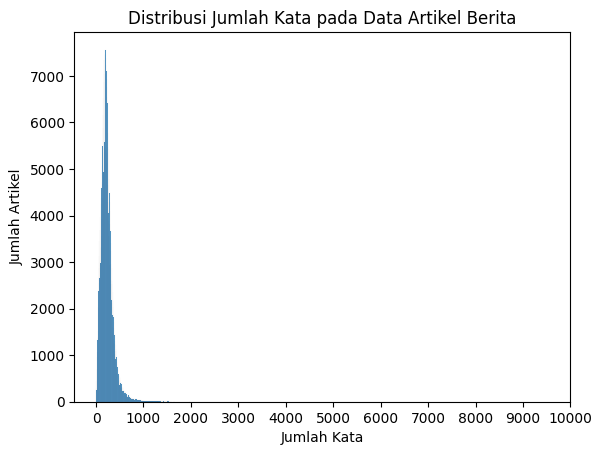

In [ ]:
# Menampilkan histogram untuk distribusi jumlah kata dari keseluruhan data artikel berita
colors = sns.color_palette('pastel')
sns.histplot(new_df['length'])
plt.title('Distribusi Jumlah Kata pada Data Artikel Berita')
plt.xticks([i*1000 for i in range(11)])
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.show()

In [ ]:
# Mengambil artikel-artikel dengan jumlah kata kurang dari 1000
df_test = new_df[new_df['length'] < 1000]

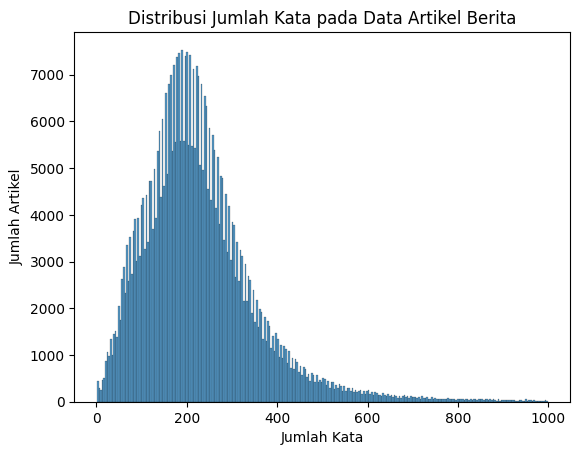

In [ ]:
# Menampilkan histogram distribusi banyak kata pada artikel-artikel di df_all (jumlah kata kurang dari 1000)
colors = sns.color_palette('pastel')
sns.histplot(df_test['length'])
plt.title('Distribusi Jumlah Kata pada Data Artikel Berita')
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.show()

In [ ]:
# Cek persentase artikel yang memiliki jumlah kata kurang dari 1000
print('Persentase jumlah artikel berita dengan jumlah kata kurang dari 1000:', len(new_df[new_df['length'] < 1000])/len(new_df) * 100, '%')

Persentase jumlah artikel berita dengan jumlah kata kurang dari 1000: 99.65041103586304 %


In [ ]:
# Cek jumlah baris data artikel yang memiliki jumlah kata kurang dari 1000
print('Banyaknya baris artikel berita dengan jumlah kata kurang dari 1000:', len(new_df[new_df['length'] < 1000]), 'baris')

Banyaknya baris artikel berita dengan jumlah kata kurang dari 1000: 454085 baris


In [ ]:
# Mengambil artikel-artikel dengan jumlah kata <= 500
df_test2 = new_df[new_df['length'] <= 500]

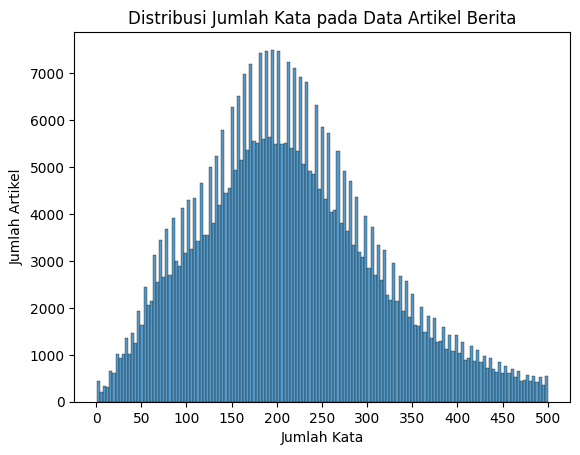

In [ ]:
# Menampilkan histogram distribusi banyak kata pada artikel-artikel di df_all (jumlah kata kurang dari 500)
colors = sns.color_palette('pastel')
sns.histplot(df_test2['length'])
plt.title('Distribusi Jumlah Kata pada Data Artikel Berita')
plt.xticks([i*10 for i in range(0, 51, 5)])
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.show()

In [ ]:
# Cek persentase artikel yang memiliki jumlah <= 500
print('Persentase jumlah artikel yang memiliki jumlah kata kurang dari atau sama dengan 500:', len(df_test2)/len(new_df) * 100, '%')

Persentase jumlah artikel yang memiliki jumlah kata kurang dari atau sama dengan 500: 96.0733237066525 %


In [ ]:
# Cek jumlah baris data artikel yang memiliki jumlah kata  <= 500
print('Banyaknya baris artikel yang memiliki jumlah kata kurang dari atau sama dengan 500:', len(df_test2), 'baris')

Banyaknya baris artikel yang memiliki jumlah kata kurang dari atau sama dengan 500: 437785 baris


In [ ]:
# Mengambil artikel-artikel dengan jumlah kata lebih dari 50 dan kurang dari 500
df_test3 = new_df[(new_df['length'] >= 50) & (new_df['length'] <= 500)]

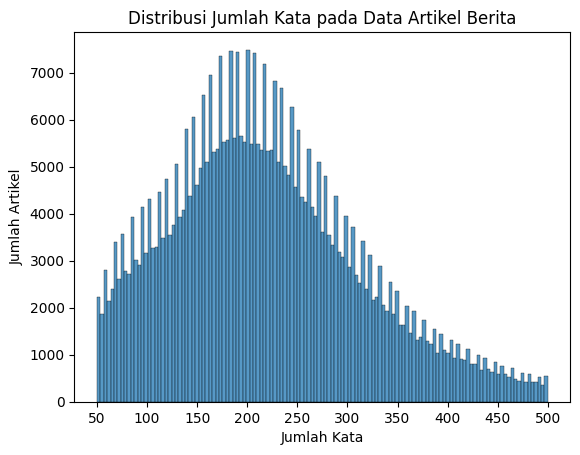

In [ ]:
# Menampilkan histogram distribusi banyak kata pada artikel-artikel di df_all (jumlah kata minimal 50 dan maksimal 500)
colors = sns.color_palette('pastel')
sns.histplot(df_test3['length'])
plt.title('Distribusi Jumlah Kata pada Data Artikel Berita')
plt.xticks([i*10 for i in range(5,51,5)])
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.show()

In [ ]:
# Cek persentase artikel yang memiliki jumlah kata minimal 50 dan maksimal 500
print('Persentase jumlah artikel yang memiliki jumlah kata lebih dari 50 dan kurang dari 500:', len(df_test3)/len(new_df) * 100, '%')

Persentase jumlah artikel yang memiliki jumlah kata lebih dari 50 dan kurang dari 500: 93.3211609952642 %


In [ ]:
# Cek persentase artikel yang memiliki jumlah kata minimal 50 dan maksimal 500
print('Banyaknya baris artikel yang memiliki jumlah kata lebih dari 50 dan kurang dari 500:', len(df_test3), 'baris')

Banyaknya baris artikel yang memiliki jumlah kata lebih dari 50 dan kurang dari 500: 425244 baris


## Untuk Kolom "title"

In [ ]:
# Menambahkan kolom 'title_length' untuk mengetahui jumlah kata pada setiap judul
df_test3['title_length'] = df_test3['title'].progress_apply(lambda row: len(row.split(' ')))

  0%|          | 0/425244 [00:00<?, ?it/s]

<ipython-input-39-24e234742bec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test3['title_length'] = df_test3['title'].progress_apply(lambda row: len(row.split(' ')))


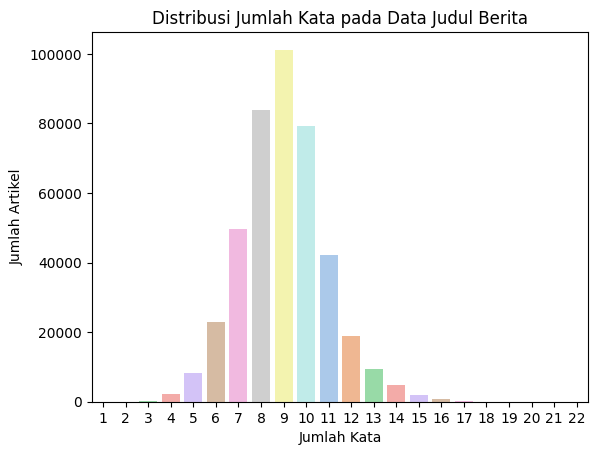

In [ ]:
# Menampilkan distribusi banyaknya kata dalam judul
x = df_test3['title_length'].value_counts().index
y = df_test3['title_length'].value_counts().values
colors = sns.color_palette('pastel')
sns.barplot(data=df_test3, x=x, y=y, palette=colors)
plt.title('Distribusi Jumlah Kata pada Data Judul Berita')
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Artikel')
plt.show()

In [ ]:
# Mendapatkan rata-rata jumlah kata dalam judul berita
df_test3['title_length'].mean()

9.006361053889062

# Menyimpan Data Baru

In [ ]:
df_test3.to_csv('/content/drive/MyDrive/Tugas Akhir 2/Files/Data Artikel 2 v3.csv')